## Step 1
Load raw data with minfi and create an object called RGset storing the RGChannelSet object.

Minfi is an R library used for analyzing and visualizing Illumina infinium methylation assays.

In [ ]:
#minfi installation
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("minfi")

In [ ]:
#1 clean the workspace
rm(list=ls())  

#2 set the working directory
setwd("~/DNARNA/") 

#3 Load minfi package and illumina manifest, a tab-delimited file that specifies the names and locations of targeted reference regions.
library(minfi)
load('~/DNARNA/Illumina450Manifest_clean.RData')

#4 Set the data directory
dataDir <- ("~/DNARNA/Input_data")

#5 reading the sample sheet containing pheno-data with minfi
targets <- read.metharray.sheet(dataDir) 

In [3]:
targets

Sample,Group,Sex,Age,Array,Slide,Basename
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
A,WT,M,1,R01C01,200400320115,/home/jovyan/DNARNA/Input_data/200400320115_R01C01
B,MUT,F,1,R02C01,200400320115,/home/jovyan/DNARNA/Input_data/200400320115_R02C01
C,WT,M,5,R03C01,200400320115,/home/jovyan/DNARNA/Input_data/200400320115_R03C01
D,WT,M,0,R04C01,200400320115,/home/jovyan/DNARNA/Input_data/200400320115_R04C01
E,MUT,F,3,R02C02,200400320115,/home/jovyan/DNARNA/Input_data/200400320115_R02C02
F,MUT,F,2,R03C02,200400320115,/home/jovyan/DNARNA/Input_data/200400320115_R03C02
G,WT,F,9,R04C02,200400320115,/home/jovyan/DNARNA/Input_data/200400320115_R04C02
H,MUT,F,1,R05C02,200400320115,/home/jovyan/DNARNA/Input_data/200400320115_R05C02


In [ ]:
#6 to read the methylation array data we create a variable that stores the RGChannelSet object, with the fluorescence intensities
RGset <- read.metharray.exp(targets = targets)

In [86]:
RGset

class: RGChannelSet 
dim: 622399 8 
metadata(0):
assays(2): Green Red
rownames(622399): 10600313 10600322 ... 74810490 74810492
rowData names(0):
colnames(8): 200400320115_R01C01 200400320115_R02C01 ...
  200400320115_R04C02 200400320115_R05C02
colData names(8): Sample Group ... Basename filenames
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19

# Step 2
Create the dataframes Red and Green to store the red and green fluorescences respectively.

In [5]:
Red <- data.frame(getRed(RGset))
Green <- data.frame(getGreen(RGset))

In [6]:
head(Red)

,X200400320115_R01C01,X200400320115_R02C01,X200400320115_R03C01,X200400320115_R04C01,X200400320115_R02C02,X200400320115_R03C02,X200400320115_R04C02,X200400320115_R05C02
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
10600313,591,742,613,577,592,637,812,700
10600322,4140,4154,4553,3965,3248,3933,5749,7030
10600328,6535,6250,6223,6208,6154,6301,6129,5731
10600336,15752,15110,16277,15746,13907,15217,14955,15061
10600345,597,1027,624,742,529,458,1674,393
10600353,1464,1381,1863,1593,1591,1584,1649,1237


In [7]:
head(Green)

,X200400320115_R01C01,X200400320115_R02C01,X200400320115_R03C01,X200400320115_R04C01,X200400320115_R02C02,X200400320115_R03C02,X200400320115_R04C02,X200400320115_R05C02
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
10600313,289,390,408,360,337,431,428,379
10600322,7070,9820,9225,8324,8910,9553,7285,7154
10600328,6421,7184,6963,7171,6836,6522,7554,6933
10600336,1571,1467,1526,1864,1620,1496,1602,3729
10600345,5692,6353,7518,6360,6418,6805,6566,4261
10600353,4280,4824,5346,4373,5110,4774,5290,4087


# Step 3
What are the Red and Green fluorescences for the address 31763489?

In [8]:
red_add <- Red[rownames(Red)=="31763489",]
red_add

,X200400320115_R01C01,X200400320115_R02C01,X200400320115_R03C01,X200400320115_R04C01,X200400320115_R02C02,X200400320115_R03C02,X200400320115_R04C02,X200400320115_R05C02
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
31763489,3070,4415,3453,3115,263,356,2140,252


In [9]:
green_add <- Green[rownames(Green)=="31763489",]
green_add

,X200400320115_R01C01,X200400320115_R02C01,X200400320115_R03C01,X200400320115_R04C01,X200400320115_R02C02,X200400320115_R03C02,X200400320115_R04C02,X200400320115_R05C02
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
31763489,519,595,592,782,301,351,425,217


Optional: check in the manifest file if the address corresponds to a Type I or a Type II probe and, in case of Type I probe, report its color.

In [10]:
address <- Illumina450Manifest_clean[Illumina450Manifest_clean$AddressA_ID=="31763489",]
address$Infinium_Design_Type

[1] II
Levels: I II

In [89]:
filled_table <- as.data.frame(cbind(t(red_add),t(green_add),rep(c("II"),each=8)))
colnames(filled_table) <- c("Red fluor","Green fluor","Type")
filled_table

,Red fluor,Green fluor,Type
,<chr>,<chr>,<chr>
X200400320115_R01C01,3070,519,II
X200400320115_R02C01,4415,595,II
X200400320115_R03C01,3453,592,II
X200400320115_R04C01,3115,782,II
X200400320115_R02C02,263,301,II
X200400320115_R03C02,356,351,II
X200400320115_R04C02,2140,425,II
X200400320115_R05C02,252,217,II


# Step 4
Create the object MSet.raw

In [ ]:
#IlluminaHumanMethylation450kmanifest installation
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("IlluminaHumanMethylation450kmanifest")

In [6]:
#To convert the RGset object into a Methylset object
MSet.raw <- preprocessRaw(RGset)

#It contains the methylated and unmethylated signals for the dataset

In [14]:
MSet.raw

class: MethylSet 
dim: 485512 8 
metadata(0):
assays(2): Meth Unmeth
rownames(485512): cg00050873 cg00212031 ... ch.22.47579720R
  ch.22.48274842R
rowData names(0):
colnames(8): 200400320115_R01C01 200400320115_R02C01 ...
  200400320115_R04C02 200400320115_R05C02
colData names(8): Sample Group ... Basename filenames
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: Raw (no normalization or bg correction)
  minfi version: 1.40.0
  Manifest version: 0.4.0

 # Step 5
Perform the following quality checks and provide a brief comment to each step:
1. QCplot
2. check the intensity of negative controls using minfi
3. calculate detection pValues; for each sample, how many probes have a detection p-value higher than the threshold 0.01?


### 5.1
Minfi provides a simple quality control plot that uses the log median intensity in both the methylated (M) and unmethylated (U) channels.

Samples that have good quality (hence high medians for both signals) will cluster together in the upper part of the plot.

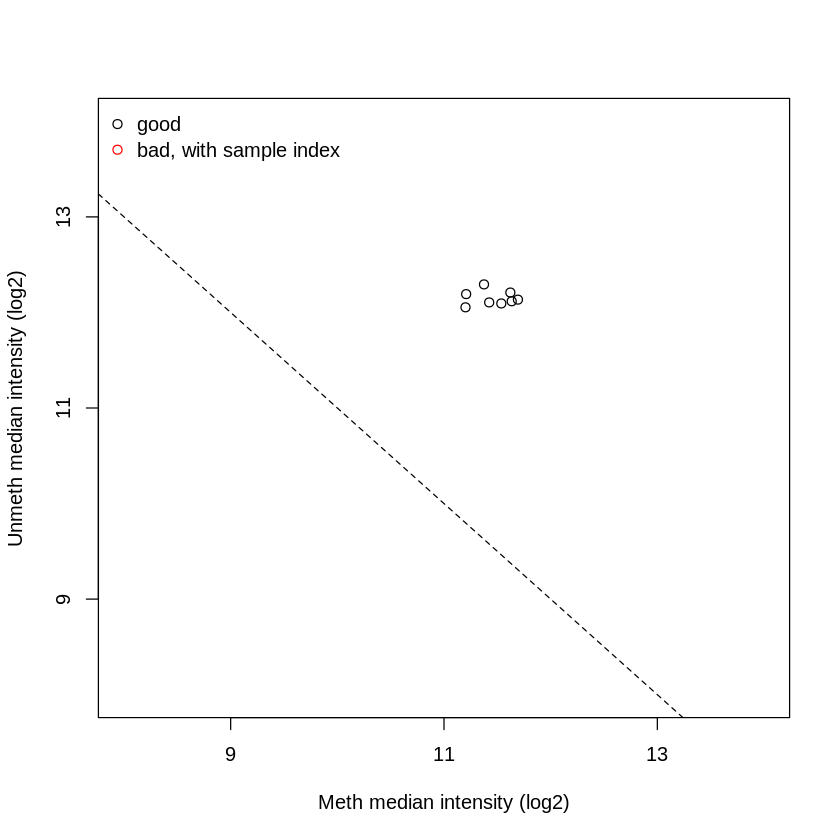

In [90]:
#1 Quality check plot
qc <- getQC(MSet.raw)
plotQC(qc)

### 5.2
The 450k array contains several internal control probes that can be used to assess the quality control of different sample preparation steps

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


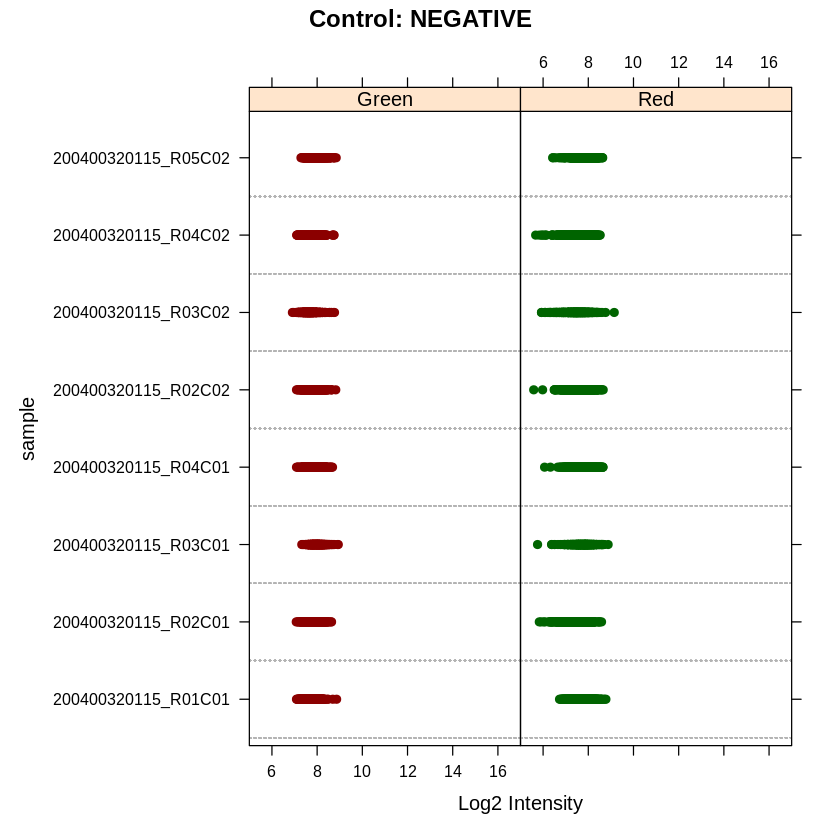

In [16]:
#2 Negative control intensity check
controlStripPlot(RGset, controls="NEGATIVE")

### 5.3
Using detectionP function on the RGset, we can detect the pvalues for all the probed positions in each of the samples.

p-values higher than the given trashold (0.01) can be read as non-significant. pvalues lower than 0.01 indicate that the associated signal is significantly different from the background signal, and we can reject the null hypothesis. 

In [17]:
#3 p-values detection

detP <- detectionP(RGset)
fail <- detP>0.01
summary(fail) 

 200400320115_R01C01 200400320115_R02C01 200400320115_R03C01
 Mode :logical       Mode :logical       Mode :logical      
 FALSE:485456        FALSE:485473        FALSE:485470       
 TRUE :56            TRUE :39            TRUE :42           
 200400320115_R04C01 200400320115_R02C02 200400320115_R03C02
 Mode :logical       Mode :logical       Mode :logical      
 FALSE:485477        FALSE:485270        FALSE:485326       
 TRUE :35            TRUE :242           TRUE :186          
 200400320115_R04C02 200400320115_R05C02
 Mode :logical       Mode :logical      
 FALSE:485491        FALSE:484962       
 TRUE :21            TRUE :550          

In [18]:
sum <- colSums(fail)
result_matrix <- as.matrix(sapply(sum,as.numeric))
result_matrix

200400320115_R01C01,56
200400320115_R02C01,39
200400320115_R03C01,42
200400320115_R04C01,35
200400320115_R02C02,242
200400320115_R03C02,186
200400320115_R04C02,21
200400320115_R05C02,550


In [19]:
colnames(result_matrix) <- c("failed positions")
result_matrix

,failed positions
200400320115_R01C01,56
200400320115_R02C01,39
200400320115_R03C01,42
200400320115_R04C01,35
200400320115_R02C02,242
200400320115_R03C02,186
200400320115_R04C02,21
200400320115_R05C02,550


# Step 6
Calculate raw beta and M values and plot the densities of mean methylation values, dividing the samples in WT and MUT (suggestion: subset the beta and M values matrixes in order to retain WT or MUT subjects and apply the function mean to the 2 subsets). Do you see any difference between the two groups?

Beta values and M values are two measures commonly used to report the methylation levels.

Beta is defined as: 
M/(M+U+100)

Where M and U are intensities measured by the methylated and unmethylated probes for an interrogated CpG site and a constant offset α (by default, α=100) is added to regularize β-value when both methylated and unmethylated probe intensities are low .


M value is instead defined as: 
log(Beta/1-Beta)


While the M-value is more statistically valid for the differential analysis of methylation levels because the M-value is approximately homoscedastic,the β-value is much more biologically interpretable, because it corresponds roughly to the percentage of a site that is methylated, which makes the β-value very attractive when modelling the underlying biological effect.




In [7]:
#Subsets
beta <- getBeta(MSet.raw)
M <- getM(MSet.raw)

In [21]:
#WT
WT <- targets[targets$Group=="WT", "Array"]
WT_beta <- beta[, targets$Array %in% WT]
WT_M <- M[, targets$Array %in% WT]

#For the beta plot
beta_mean_WT <- apply(WT_beta,1,mean)
d_beta_mean_WT <- density(beta_mean_WT,na.rm=T)

#For the M plot
mean_M_WT <- apply(WT_M,1,mean)
d_mean_M_WT <- density(mean_M_WT,na.rm=T)

In [22]:
#MUT
MUT <- targets[targets$Group=='MUT',"Array"]
MUT_beta <- beta[, targets$Array %in% MUT]
MUT_M <- M[, targets$Array %in% MUT]

#For the beta plot
beta_mean_MUT <- apply(MUT_beta,1,mean)
d_beta_mean_MUT <- density(beta_mean_MUT,na.rm=T)

#For the M plot
mean_M_MUT <- apply(MUT_M,1,mean)
d_mean_M_MUT <- density(mean_M_MUT,na.rm=T)

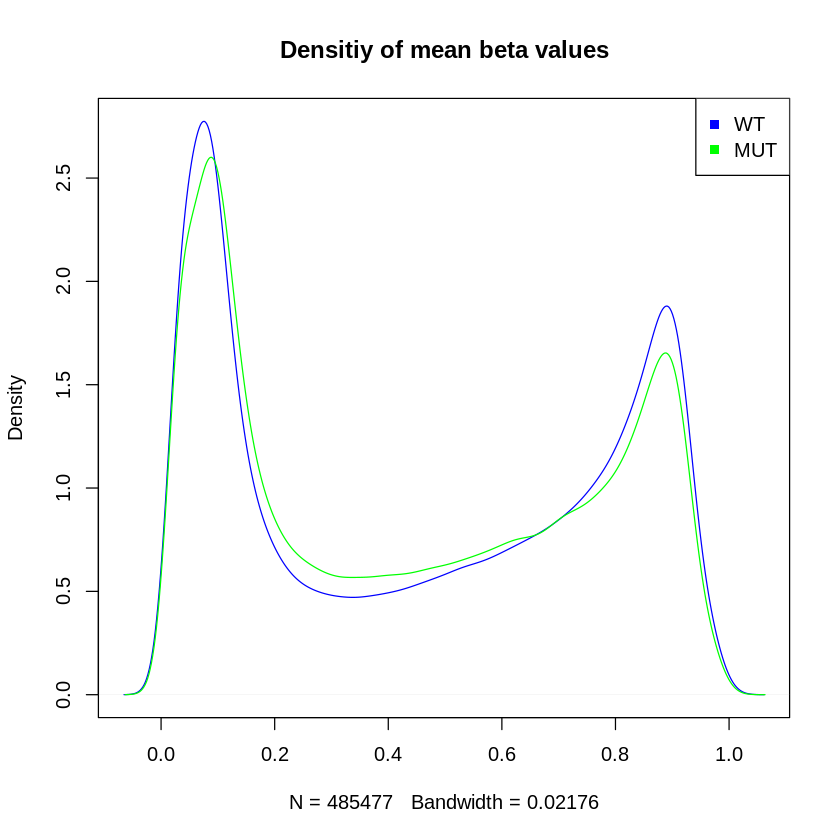

In [23]:
#beta value plot
plot(d_beta_mean_WT, col='blue',main='Densitiy of mean beta values')
lines(d_beta_mean_MUT,col='green')
legend('topright', pch=c(15,15), col=c('blue','green'), legend=c('WT','MUT'))

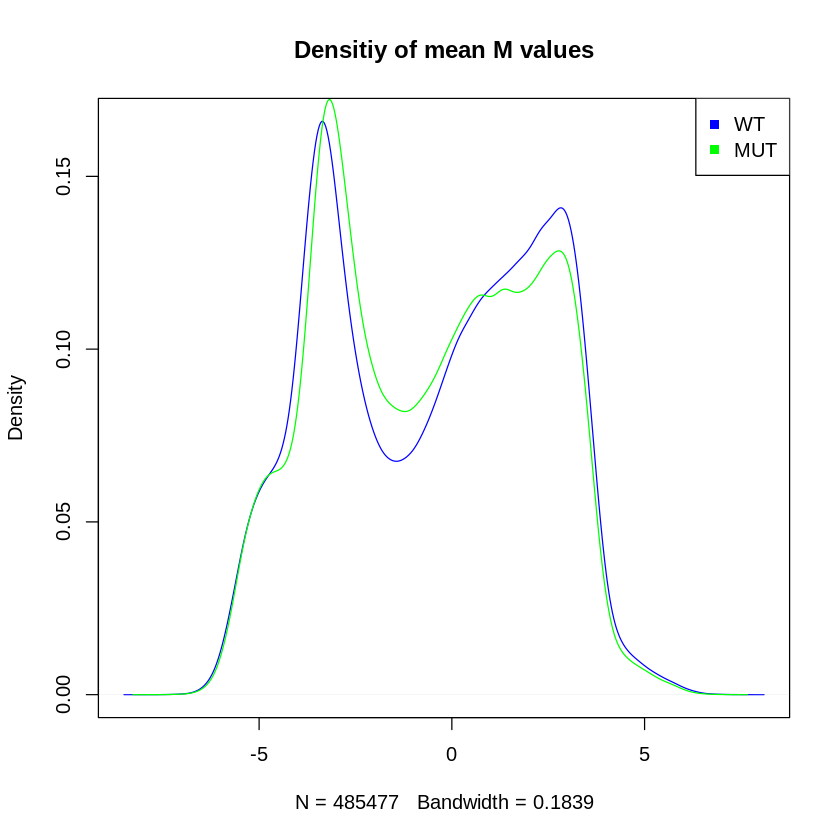

In [24]:
#M value plot
plot(d_mean_M_WT, col='blue',main='Densitiy of mean M values')
lines(d_mean_M_MUT,col='green')
legend('topright', pch=c(15,15), col=c('blue','green'), legend=c('WT','MUT'))

By looking at the two graphs seems that WT and MUT have a similar distribution for both the beta value and the M value. It's possible to note some slightly difference only on the peaks.

# Step 7
Normalize the data using preprocessNoob and compare raw data and normalized data. Produce a plot with 6 panels in which, for both raw and normalized data, you show the density plots of beta mean values according to the chemistry of the probes, the density plot of beta standard deviation values according to the chemistry of the probes and the boxplot of beta values. Provide a short comment about the changes you observe. 

Optional: do you think that the normalization approach that you used is appropriate considering this specific dataset? Try to color the boxplots according to the group (WT and MUT) and check whether the distribution of methylation values is different between the two groups, before and after normalization … 

In [ ]:
#IlluminaHumanMethylation450kmanifest installation
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("IlluminaHumanMethylation450kanno.ilmn12.hg19")

The function preprocessNoob implements the noob background subtraction method with dye-bias normalization. Briefly, the background subtraction method estimates background noise from the out-of-band probes and remove it for each sample separately, while the dye-bias normalization utilizes a subset of the control probes to estimate the dye bias. 

In [ ]:
#To normalize the data from RGset and extract the normalized Beta from it

Noob_results <- preprocessNoob(RGset)
Noob_Beta <- getBeta(Noob_results)

In [8]:
#RAW DATA
# Infinium design I
infI <- Illumina450Manifest_clean[Illumina450Manifest_clean$Infinium_Design_Type=="I",]
infI <- droplevels(infI)

# cross-reference between InfI_df and raw beta
BetaI <- beta[rownames(beta) %in% infI$IlmnID,]

# we compute the mean and the standard deviation
mBeta_I <- apply(BetaI,1,mean)
sdBeta_I <- apply(BetaI, 1, sd)

# we compute the densities
d_mBetaI <- density(mBeta_I, na.rm=T)
d_sdBetaI <- density(sdBeta_I,na.rm=T)

In [9]:
#RAW DATA
# Infinium design II
infII <- Illumina450Manifest_clean[Illumina450Manifest_clean$Infinium_Design_Type=="II",]
infII <- droplevels(infII)

# cross-reference between InfII_df and raw beta
BetaII <- beta[rownames(beta) %in% infII$IlmnID,]

# we compute the mean and the standard deviation
mBeta_II <- apply(BetaII,1,mean)
sdBeta_II <- apply(BetaII,1,sd)

# we compute the densities
d_mBetaII <- density(mBeta_II, na.rm=T)
d_sdBetaII <- density(sdBeta_II, na.rm=T)

In [10]:
#NORMALIZED
# Infinium design I
# cross-reference between InfI_df and normalized beta
Noob_Beta_I <- Noob_Beta[rownames(Noob_Beta) %in% infI$IlmnID,]

# computing mean and sd
mBeta_Noob_I <- apply(Noob_Beta_I, 1, mean)
sdBeta_Noob_I <- apply(Noob_Beta_I, 1, sd)

# computing densities
d_mBeta_Noob_I <- density(mBeta_Noob_I, na.rm=T)
d_sdBeta_Noob_I <- density(sdBeta_Noob_I, na.rm=T)

In [13]:
#NORMALIZED
# Infinium design II
# cross-reference between InfII_df and normalized beta
NoobBeta_II <- Noob_Beta[rownames(Noob_Beta) %in% infII$IlmnID,]

# computing mean and sd
mBeta_Noob_II <- apply(NoobBeta_II, 1, mean)
sdBeta_Noob_II <- apply(NoobBeta_II, 1, sd)

# computing the densities
d_mBeta_Noob_II <- density(mBeta_Noob_II, na.rm=T)
d_sdBeta_Noob_II <- density(sdBeta_Noob_II, na.rm=T)

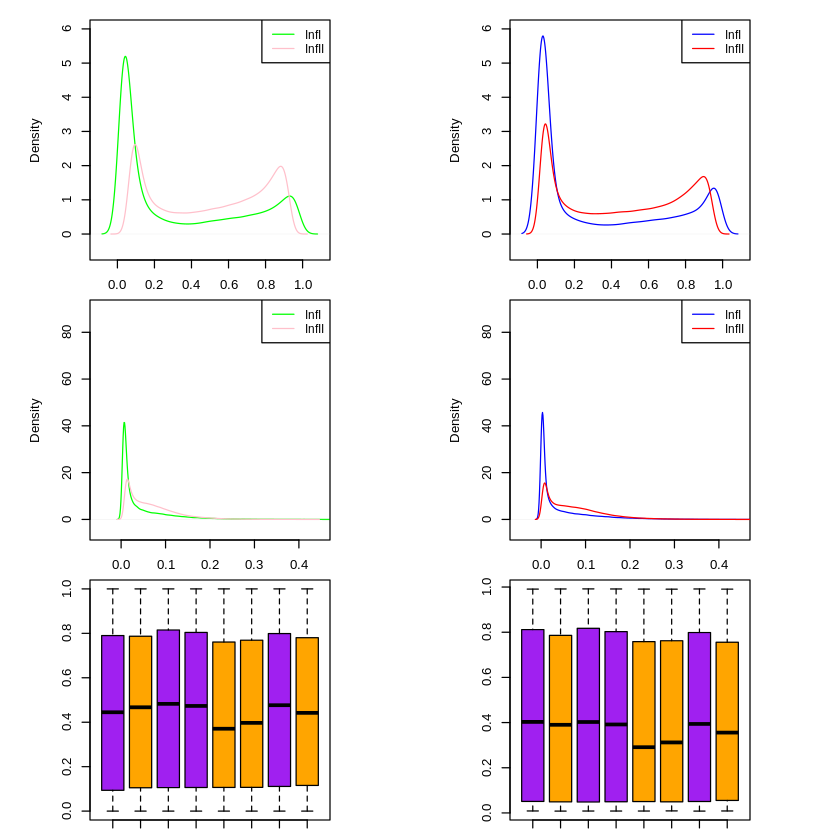

In [21]:
# Mean beta raw
par(mfrow=c(3,2), pin = c(2,2))
plot(d_mBetaI, col = "green", main = "Beta mean for raw data", xlim=c(-0.1,1.1),ylim = c(-0.5,6))
lines(d_mBetaII, col = "pink")
legend("topright", legend=c("InfI", "InfII"),
       col=c("green", "pink"), lty=1:1, cex=0.9)

# Mean beta norm
plot(d_mBeta_Noob_I,col="blue",main="Beta mean for normalized data", xlim = c(-0.1,1.1), ylim = c(-0.5
  ,6))
lines(d_mBeta_Noob_II,col="red")
legend("topright", legend=c("InfI", "InfII"),
       col=c("blue", "red"), lty=1:1, cex=0.9)

# sd beta raw
plot(d_sdBetaI, col = "green", main = "Beta STdev for raw data", xlim = c(-0.05,0.45), ylim = c(-5,90))
lines(d_sdBetaII, col = "pink")
legend("topright", legend=c("InfI", "InfII"),
       col=c("green", "pink"), lty=1:1, cex=0.9)

# sd beta norm
plot(d_sdBeta_Noob_I,col="blue",main="Beta STdev for normalized data", xlim = c(-0.05,0.45), ylim = c(-5
  ,90))
lines(d_sdBeta_Noob_II,col="red")
legend("topright", legend=c("InfI", "InfII"),
       col=c("blue", "red"), lty=1:1, cex=0.9)

colorbar <- c("purple","orange","purple","purple","orange","orange","purple","orange")
# beta raw
boxplot(beta,col = colorbar, main="Beta raw boxplot")
# beta norm
boxplot(Noob_Beta,col = colorbar, main = "Beta preprocessNoob boxplot")

The distribution appears to be very similar before and after the normalization.


# Step 9
Using the matrix of normalized beta values generated in step 7, identify differentially methylated probes between group WT and group MUT using the t-test function.

In [36]:
samples <- read.csv("~/DNARNA/Input_data/Samplesheet_report_2022.csv",header=T, stringsAsFactors=T)
head(samples)

,Sample,Group,Sex,Age,Sentrix_ID,Sentrix_Position
,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>
1,A,WT,M,1,200400320115,R01C01
2,B,MUT,F,1,200400320115,R02C01
3,C,WT,M,5,200400320115,R03C01
4,D,WT,M,0,200400320115,R04C01
5,E,MUT,F,3,200400320115,R02C02
6,F,MUT,F,2,200400320115,R03C02


In [37]:
ttest_f <- function(x) {
  t_test <- t.test(x~ samples$Group)
    return(t_test$p.value)
}

pValues_ttest <- apply(Noob_Beta,1, ttest_f)

In [57]:
table_ttest <- data.frame(Noob_Beta,pValues_ttest)
head(table_ttest)

,X200400320115_R01C01,X200400320115_R02C01,X200400320115_R03C01,X200400320115_R04C01,X200400320115_R02C02,X200400320115_R03C02,X200400320115_R04C02,X200400320115_R05C02,pValues_ttest
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg00050873,0.60902237,0.54450173,0.58671467,0.57664375,0.7598919,0.6150116,0.44082908,0.4879746,0.51815743
cg00212031,0.03234116,0.02650027,0.03204569,0.03164349,0.4626757,0.4594574,0.05397206,0.5163511,0.06315453
cg00213748,0.25277399,0.27311353,0.15205295,0.16421932,0.4711945,0.5002054,0.17198102,0.5082548,0.01370822
cg00214611,0.04453819,0.03987687,0.04326100,0.04549415,0.4561333,0.4903997,0.07263709,0.4860953,0.06285357
cg00455876,0.56515153,0.57659370,0.43392759,0.53470919,0.3398542,0.3389948,0.42454247,0.4062826,0.31328547
cg01707559,0.04157816,0.03382566,0.04851786,0.05233304,0.1201074,0.1531997,0.04469940,0.1396149,0.09371478


# Step 10
Apply multiple test correction and set a significant threshold of 0.05. How many probes do you identify as differentially methylated considering nominal pValues? How many after Bonferroni correction? How many after BH correction?

In [58]:
table_ttest_ord <- table_ttest[order(table_ttest$pValues_ttest),]

In [59]:
# How many probes are differentially methylated considering a pvalue th of 0.05?
dim(table_ttest[table_ttest_ord$pValues_ttest<=0.05,])

[1] 63437     9

In [60]:
pValues <- table_ttest_ord$pValues_ttest

# bonferroni correction applied on raw p-values
ttest_bonf_pvalues <- p.adjust(pValues,"bonferroni")

# Benjamini-Hochberg correction applied on raw p-values
ttest_BH_pvalues <- p.adjust(pValues, "BH")

corr_table_ttest <- data.frame(table_ttest_ord, ttest_bonf_pvalues, ttest_BH_pvalues)

In [61]:
# How many probes are differentially methylated after Bonferroni correction?
dim(corr_table_ttest[corr_table_ttest$ttest_bonf_pvalues<=0.05,])

[1]  5 11

In [62]:
#How many probes are differentially methylated after Bonferroni correction?
dim(corr_table_ttest[corr_table_ttest$ttest_BH_pvalues<=0.05,])

[1] 213  11

In [63]:
# Recap
recap_table <- as.data.frame(cbind(c("None","Bonferroni","BH"),c(63437,5,213)))
colnames(recap_table) <- c("Correction","Differentially methylated probes")
recap_table

Correction,Differentially methylated probes
<chr>,<chr>
None,63437
Bonferroni,5
BH,213


# Step 11
Produce a volcano plot and a Manhattan plot of the results of differential methylation analysis. 

In [65]:
beta_group_WT <- table_ttest[,samples$Group=="WT"]
mean_beta_group_WT <- apply(beta_group_WT,1,mean)

beta_group_MUT <- table_ttest[,samples$Group=="MUT"]
mean_beta_group_MUT <- apply(beta_group_MUT,1,mean)

In [66]:
#mean difference
delta <- mean_beta_group_WT-mean_beta_group_MUT

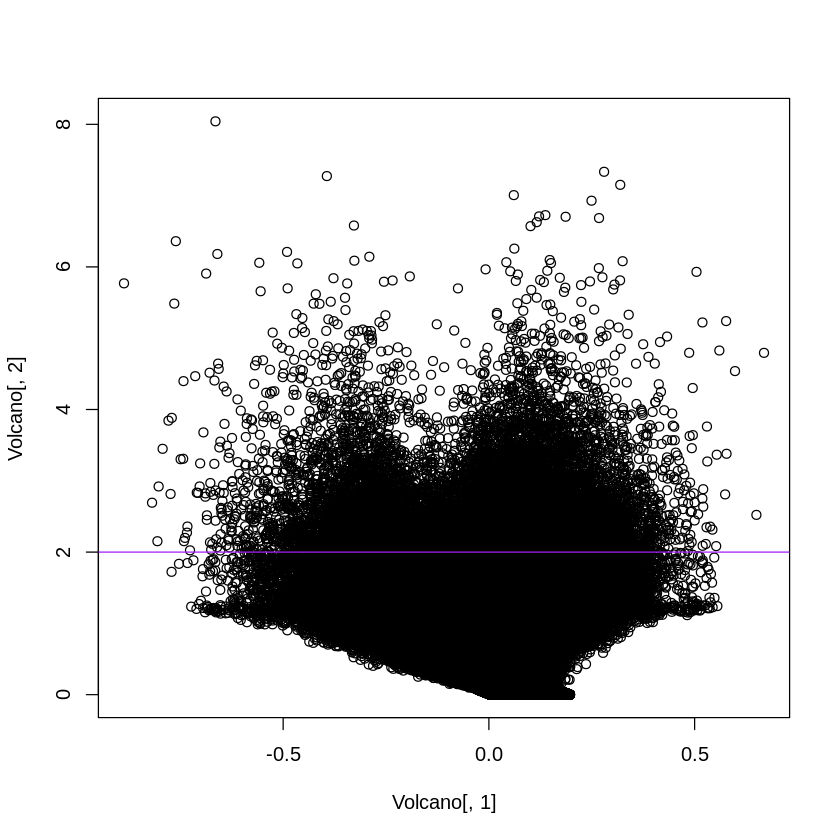

In [68]:
Volcano <- data.frame(delta, -log10(table_ttest$pValues_ttest))
plot(Volcano[,1], Volcano[,2])
abline(h=-log10(0.01),col="purple")

In [ ]:
#qqman library installation
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("qqman")

In [79]:
library(qqman)
new_tablet <- data.frame(rownames(table_ttest),table_ttest)

In [80]:
colnames(new_tablet)

[1] "rownames.table_ttest." "X200400320115_R01C01"  "X200400320115_R02C01" 
 [4] "X200400320115_R03C01"  "X200400320115_R04C01"  "X200400320115_R02C02" 
 [7] "X200400320115_R03C02"  "X200400320115_R04C02"  "X200400320115_R05C02" 
[10] "pValues_ttest"

In [81]:
colnames(new_tablet)[1] <- "IlmnID"
ttest_annotated <- merge(new_tablet, Illumina450Manifest_clean,by="IlmnID")

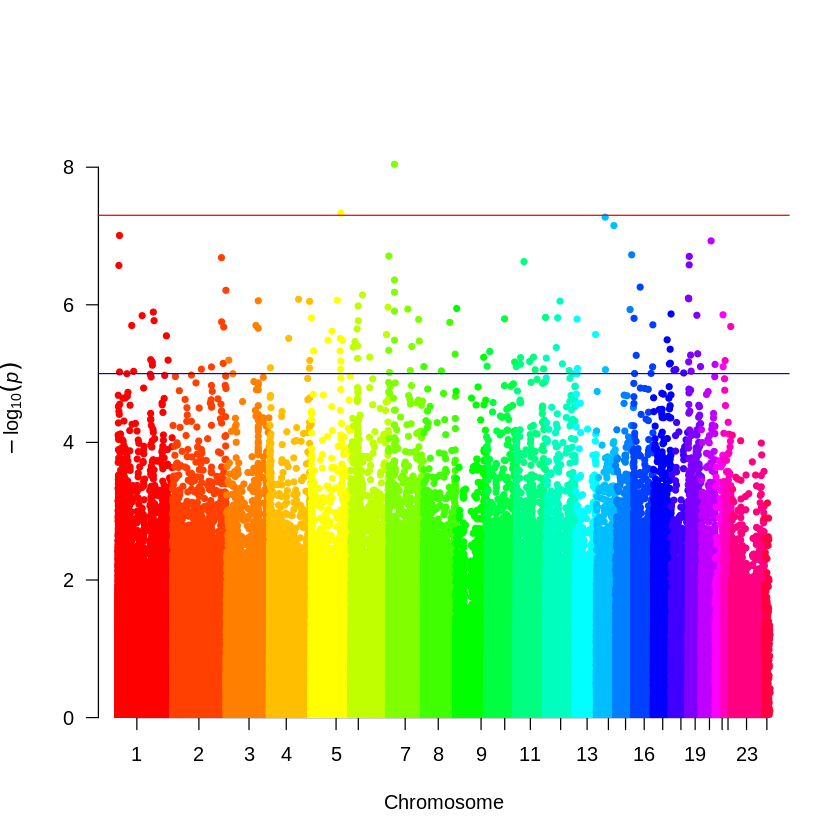

In [85]:
input_Manhattan <- ttest_annotated[colnames(ttest_annotated) %in% c("IlmnID","CHR","MAPINFO","pValues_ttest")]
order_chr <- c("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","X","Y")
input_Manhattan$CHR <- factor(input_Manhattan$CHR,levels=order_chr )
input_Manhattan$CHR <- as.numeric(input_Manhattan$CHR)
manhattan(input_Manhattan, snp="IlmnID",chr="CHR", bp="MAPINFO", p="pValues_ttest",col=rainbow(24) )

# Step 12
Produce an heatmap of the top 100 differentially mehtylated probes. 

In [ ]:
#gplots installation
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("gplots")

In [72]:
library(gplots)
input_heatmap=as.matrix(table_ttest_ord[1:100,1:8])

[1] WT  MUT WT  WT  MUT MUT WT  MUT
Levels: MUT WT

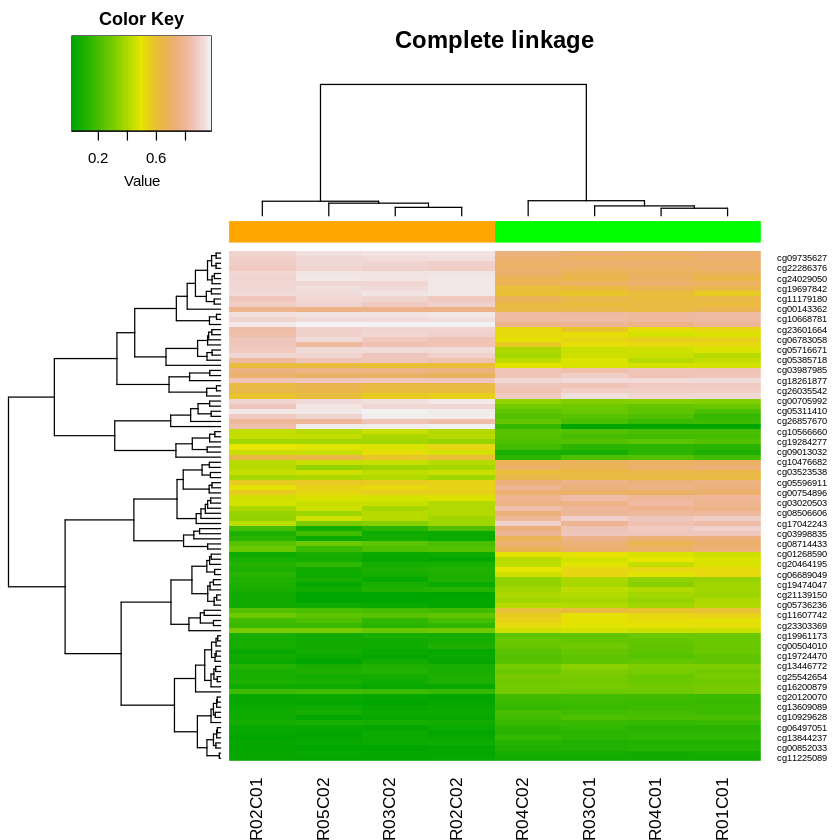

In [75]:
samples$Group #to check the group order in the samplesheet and match it with the colors
colorbar <- c("green","orange","green","green","orange","orange","green","orange")
heatmap.2(input_heatmap,col=terrain.colors(100),Rowv=T,Colv=T,dendrogram="both",key=T,ColSideColors=colorbar,density.info="none",trace="none",scale="none",symm=F,main="Complete linkage")